##  Z -test Vs T test

#### 1. When to use?
- Z test:
  - Population standard deviation(sigma) is known
  - Sample size is large(n>=30)(By CLT)
- T test:
  - Population standard deviation (sigma) is unknown (use  sample SD)
  - Sample size is small(n<30)

#### 2. Distribution Used
- Z test: Standard Normal(z distribution)
- T test: Student's distribution(fatter tails for small samples)




#### Differenciating Z-test and T-test based Confidence Intervals

###### Critical Value:
- z test: Fixed z-value(e.g. 1.96 for 95% CI )
- t test: t-value(varies with df, larger for small samples)
###### Width of CI:
- z test : Norrower(more precise)
- t test : Wider(accounts for extra uncertainty)

In [1]:
import pandas as pd
data=pd.read_csv('NHANES_BMI_clean_data.csv')
data.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMXHIP,BMXARMC,BMXLEG,BMXARML
0,130378.0,86.9,179.5,27.0,98.3,102.9,35.7,42.800000,42.0
1,130379.0,101.8,174.2,33.5,114.7,112.4,33.7,38.500000,38.7
2,130380.0,69.4,152.9,29.7,93.5,98.0,36.3,38.500000,35.5
3,130381.0,34.3,120.1,23.8,70.4,103.7,23.4,38.128843,25.4
4,130386.0,90.6,173.3,30.2,106.1,110.6,35.7,42.800000,36.2


In [3]:
import numpy as np
from scipy import stats
from scipy.stats import norm

#sample data
np.random.seed(0)
df=data.copy()

#t test sample
t_sample=df['BMXLEG'].sample(20)

#z test sample
z_sample = df['BMXLEG'].sample(50)

# performing CI z test 
#--------------------------Manually----------------------------#
z_n= len(z_sample)
z_mean= np.mean(z_sample)
z_std =np.std(z_sample,ddof=1)
z_margin= norm.ppf(0.975) * (z_std/np.sqrt(z_n))
z_ci= (z_mean-z_margin,z_mean + z_margin)

#------------------------Built-in-----------------------------#
z_ci= norm.interval(confidence=0.95,loc=z_mean, scale=z_std/np.sqrt(z_n))


#performing CI t test
#--------------------------Manually----------------------------#
t_n= len(t_sample)
t_mean= np.mean(t_sample)
t_std =np.std(t_sample,ddof=1)
t_margin= stats.t.ppf(0.975, df=t_n-1) * (t_std/np.sqrt(t_n))
t_ci= (t_mean-t_margin,t_mean + t_margin)

#------------------------Built-in-----------------------------#
t_ci= stats.t.interval(confidence=0.95,df=t_n-1,loc=t_mean, scale=t_std/np.sqrt(t_n))

print(f'True Population mean:, {data['BMXLEG'].mean():.2f}')
print("CI z test:", np.round(z_ci, 2))
print("CI t test:", np.round(t_ci, 2))

                                                               


True Population mean:, 38.13
CI z test: [36.5  38.34]
CI t test: [37.04 40.04]


#### Intrepretation

- CI z test [36.5, 38.34]: You are 95% confident that true population mean of BMXLEG lies between 36.5 and 38.34 cm
- CI t test [37.04 40.04]: You are 95% confident that true population mean of BMXLEG lies between 37.04 and 40.04 cm
- ##### Why the ranges differ?
    - t distribution is wider(has heavier tails) than the z- distribution which means it gives wider interval to reflect more uncertainty in small            samples.
    - That's why the t test ci is broader than the z test CI, even though both target the same variable.

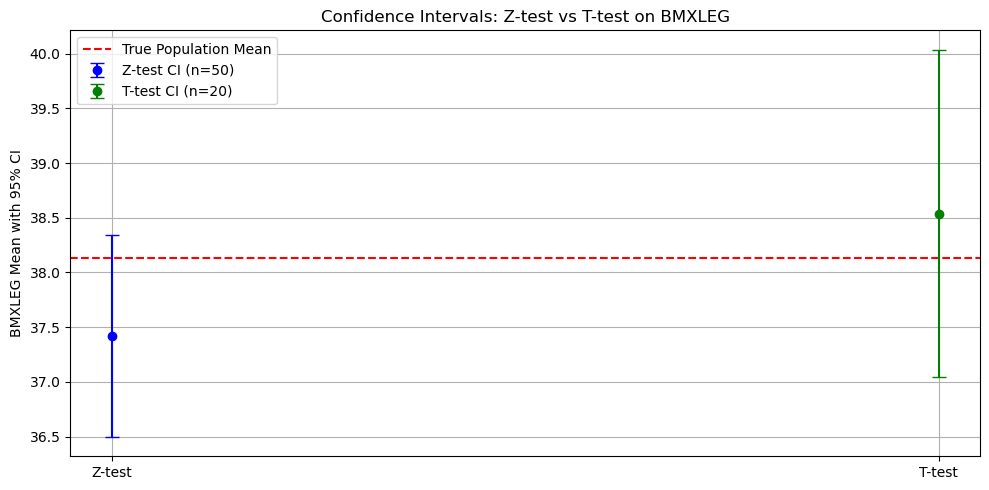

In [30]:
import matplotlib.pyplot as plt

# True population mean
pop_mean = data['BMXLEG'].mean()

# Plot confidence intervals
plt.figure(figsize=(10, 5))

# Plot population mean
plt.axhline(y=pop_mean, color='red', linestyle='--', label='True Population Mean')

# Plot Z-test CI
plt.errorbar(x=1, y=z_mean, yerr=(z_ci[1]-z_mean), fmt='o', capsize=5, label='Z-test CI (n=50)', color='blue')

# Plot T-test CI
plt.errorbar(x=2, y=t_mean, yerr=(t_ci[1]-t_mean), fmt='o', capsize=5, label='T-test CI (n=20)', color='green')

# Decorations
plt.xticks([1, 2], ['Z-test', 'T-test'])
plt.ylabel('BMXLEG Mean with 95% CI')
plt.title('Confidence Intervals: Z-test vs T-test on BMXLEG')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Differenciating_Z_test_and_T_test_based_Confidence_Intervals.png')

plt.show()
